In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
from epam.dnsm import TransformerBinarySelectionModel, DNSMBurrito
from epam.sequences import translate_sequences, translate_sequence
from epam.shmple_precompute import load_and_convert_to_tensors

In [2]:
pcp_df = load_and_convert_to_tensors("/Users/matsen/data/wyatt-10x-1p5m_pcp_2023-10-07.shmple.hdf5")

# filter out rows of pcp_df where the parent and child sequences are identical
pcp_df = pcp_df[pcp_df["parent"] != pcp_df["child"]]

pcp_df["v_family"] = pcp_df["v_gene"].str.split("-").str[0]

pcp_df["v_family"].value_counts()

v_family
IGHV3    36198
IGHV4    13131
IGHV1     5858
IGHV5     2130
IGHV2     1581
IGHV6      855
IGHV7      540
Name: count, dtype: int64

In [3]:
chosen_v_families = set(["IGHV3", "IGHV4"])
                        
# only keep rows where v_family is in chosen_v_families
pcp_df = pcp_df[pcp_df["v_family"].isin(chosen_v_families)]

# per_v_family_count = 10000 
# # Group by 'v_family' and sample per_v_family_count from each group
# sampled_groups = [
#     group.sample(n=per_v_family_count)
#     for name, group in pcp_df.groupby('v_family')
# ]
# 
# # Concatenate all the sampled groups back into one DataFrame
# pcp_df = pd.concat(sampled_groups)

# Reset index if you want a clean index
pcp_df.reset_index(drop=True, inplace=True)

print(f"We have {len(pcp_df)} PCPs.")


We have 49329 PCPs.


In [4]:
nhead = 4
dim_feedforward = 2048
layer_count = 3

dnsm = TransformerBinarySelectionModel(
    nhead=nhead, dim_feedforward=dim_feedforward, layer_count=layer_count
)

burrito = DNSMBurrito(pcp_df, dnsm, batch_size=1024, learning_rate=0.001, checkpoint_dir="./_checkpoints", log_dir="./_logs")

Using Metal Performance Shaders
preparing data...
consolidating shmple rates into substitution probabilities...
consolidating shmple rates into substitution probabilities...


In [5]:
burrito.train(3)
burrito.optimize_branch_lengths()
burrito.train_set.branch_lengths *= 2
burrito.val_set.branch_lengths *= 2
burrito.train(20)
burrito.optimize_branch_lengths()
burrito.train(20)
burrito.optimize_branch_lengths()
burrito.train(20)

# burrito.writer.close()

Epoch [0/3], Training Loss: 0.15370147923628488, Validation Loss: 0.15525771230459212
training model...
Epoch [1/3], Training Loss: 0.13696140050888062, Validation Loss: 0.1425591751933098
Epoch [2/3], Training Loss: 0.14124713838100433, Validation Loss: 0.14223572015762329
Epoch [3/3], Training Loss: 0.14625613391399384, Validation Loss: 0.14212389886379242


Finding optimal branch lengths: 100%|██████████| 39463/39463 [16:59<00:00, 38.70it/s]


consolidating shmple rates into substitution probabilities...


Finding optimal branch lengths: 100%|██████████| 9866/9866 [04:11<00:00, 39.30it/s]


consolidating shmple rates into substitution probabilities...
consolidating shmple rates into substitution probabilities...
consolidating shmple rates into substitution probabilities...
Epoch [0/20], Training Loss: 0.15037774237302634, Validation Loss: 0.1520506203174591
training model...
Epoch [1/20], Training Loss: 0.14063052833080292, Validation Loss: 0.1400266945362091
Epoch [2/20], Training Loss: 0.13956692814826965, Validation Loss: 0.13999381363391877
Epoch [3/20], Training Loss: 0.13351677358150482, Validation Loss: 0.13816913664340974
Epoch [4/20], Training Loss: 0.13338598608970642, Validation Loss: 0.1374691367149353
Epoch [5/20], Training Loss: 0.13868266344070435, Validation Loss: 0.1368421047925949
Epoch [6/20], Training Loss: 0.13846921920776367, Validation Loss: 0.13652859926223754
Epoch [7/20], Training Loss: 0.13748860359191895, Validation Loss: 0.13603054136037826
Epoch [8/20], Training Loss: 0.13942381739616394, Validation Loss: 0.13590810894966127
Epoch [9/20], Tra

Finding optimal branch lengths: 100%|██████████| 39463/39463 [10:34<00:00, 62.22it/s]


consolidating shmple rates into substitution probabilities...


Finding optimal branch lengths: 100%|██████████| 9866/9866 [02:37<00:00, 62.79it/s]


consolidating shmple rates into substitution probabilities...
Epoch [0/20], Training Loss: 0.13545751839112014, Validation Loss: 0.13513164967298508
training model...
Epoch [1/20], Training Loss: 0.13668304681777954, Validation Loss: 0.1351686403155327
Epoch [2/20], Training Loss: 0.1383276879787445, Validation Loss: 0.13500056117773057
Epoch [3/20], Training Loss: 0.14275270700454712, Validation Loss: 0.13499713987112044
Epoch [4/20], Training Loss: 0.14108677208423615, Validation Loss: 0.13509926646947862
Epoch [5/20], Training Loss: 0.14639852941036224, Validation Loss: 0.13510440289974213
Epoch [6/20], Training Loss: 0.13353866338729858, Validation Loss: 0.13498710393905639
Epoch [7/20], Training Loss: 0.1393253058195114, Validation Loss: 0.135253444314003
Epoch [8/20], Training Loss: 0.13810919225215912, Validation Loss: 0.1350180387496948
Epoch [9/20], Training Loss: 0.13304460048675537, Validation Loss: 0.13503516018390654
Epoch [10/20], Training Loss: 0.13168726861476898, Valid

Finding optimal branch lengths: 100%|██████████| 39463/39463 [09:39<00:00, 68.10it/s]


consolidating shmple rates into substitution probabilities...


Finding optimal branch lengths: 100%|██████████| 9866/9866 [02:24<00:00, 68.08it/s]


consolidating shmple rates into substitution probabilities...
Epoch [0/20], Training Loss: 0.13492474685876799, Validation Loss: 0.13500017821788787
training model...
Epoch [1/20], Training Loss: 0.13373702764511108, Validation Loss: 0.13499791026115418
Epoch [2/20], Training Loss: 0.13644850254058838, Validation Loss: 0.13480422794818878
Epoch [3/20], Training Loss: 0.13740915060043335, Validation Loss: 0.1351296067237854
Epoch [4/20], Training Loss: 0.14334245026111603, Validation Loss: 0.13496283292770386
Epoch [5/20], Training Loss: 0.12422633171081543, Validation Loss: 0.13528123795986174
Epoch [6/20], Training Loss: 0.13969947397708893, Validation Loss: 0.13505444973707198
Epoch [7/20], Training Loss: 0.14102645218372345, Validation Loss: 0.1352553367614746
Epoch [8/20], Training Loss: 0.13416413962841034, Validation Loss: 0.13511372208595276
Epoch [9/20], Training Loss: 0.13120323419570923, Validation Loss: 0.13534090369939805
Epoch [10/20], Training Loss: 0.13668420910835266, V

In [6]:
[aa_str] = translate_sequences([pcp_df.reset_index(drop=True).loc[0, "parent"]])
burrito.dnsm.selection_factors_of_aa_str(aa_str)

tensor([0.3524, 0.4295, 0.3611, 0.4548, 0.3090, 0.3384, 0.2244, 0.3828, 0.4671,
        0.4454, 0.2604, 0.2424, 0.2494, 0.2074, 0.3041, 0.6304, 0.2512, 0.3320,
        0.5159, 0.4251, 0.2452, 0.0476, 0.8110, 0.7303, 0.4750, 0.3847, 0.2546,
        0.7651, 0.3064, 0.5474, 0.5610, 0.4020, 0.3199, 0.4166, 0.6263, 0.0397,
        0.2366, 0.2090, 0.2095, 0.5861, 0.3557, 0.5309, 0.5180, 0.5736, 0.5538,
        0.2599, 0.2729, 0.3048, 0.3451, 0.4780, 0.6350, 0.6368, 0.6200, 0.7589,
        0.7065, 0.7991, 0.8085, 0.8576, 0.6599, 0.6367, 0.6979, 0.7991, 0.6383,
        0.5652, 0.7585, 0.6803, 0.2994, 0.3672, 0.7083, 0.8828, 0.4982, 0.2406,
        0.1738, 0.5996, 0.6134, 0.8198, 0.5987, 0.6103, 0.5978, 0.6486, 0.5150,
        0.7844, 0.6472, 0.8374, 0.8214, 0.4220, 0.6132, 0.9464, 0.4345, 0.8863,
        0.5888, 0.4617, 0.7284, 0.2677, 0.2573, 0.0375, 0.9281, 0.6214, 0.9436,
        0.8523, 0.7522, 0.5569, 0.5003, 0.6683, 0.5801, 0.6225, 0.5762, 0.5293,
        0.5387, 0.5589, 0.5759, 0.3466, 

In [7]:
# nhead = 4
# dim_feedforward = 2048
# layer_count = 3
# 
# model = TransformerBinarySelectionModel(
#     nhead=nhead, dim_feedforward=dim_feedforward, layer_count=layer_count
# )
# 
# model.load_state_dict(torch.load("/Users/matsen/re/epam/trained_dnsms/dnsm-2023-11-01-09-32.pth")["model_state_dict"])
# model.eval()
# model.selection_factors_of_aa_str(aa_str)

In [8]:
pcp_df["parent_len"] = pcp_df["parent"].str.len()
pcp_df.head()

# find the single most common parent length overall
most_common_parent_len = pcp_df["parent_len"].value_counts().idxmax()

for group in pcp_df.groupby("v_family"):
    # print how many rows there are with parent_length == most_common_parent_len
    print(group[0], len(group[1][group[1]["parent_len"] == most_common_parent_len]))

same_parent_len_df = pcp_df[pcp_df["parent_len"] == most_common_parent_len]

IGHV3 4240
IGHV4 1370


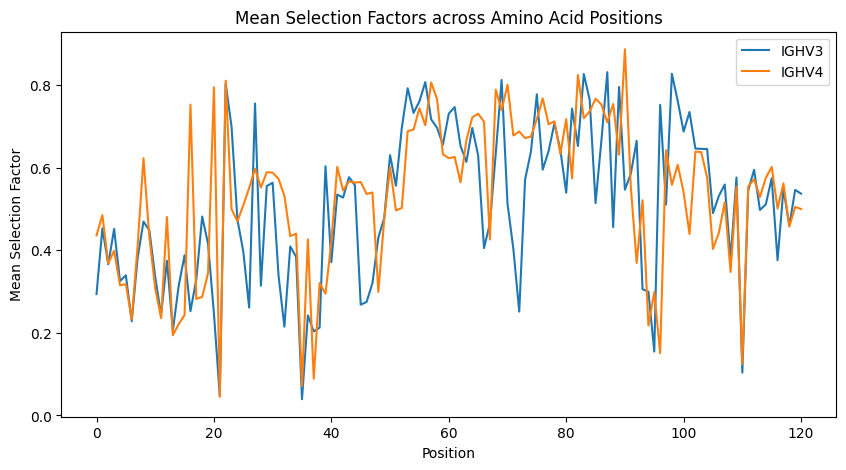

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pcp_df is your DataFrame, plot_sample_count is defined, and the other functions are imported
plot_sample_count = 10  # or set to your specific requirement

# Keep only the 'v_family' and 'parent' columns for processing
df = same_parent_len_df[['v_family', 'parent']]

# Step 1: Sample the DataFrame according to your requirements
sampled_dfs = []
for v_family, group in df.groupby('v_family'):
    if len(group) > plot_sample_count:
        sampled_group = group.sample(n=plot_sample_count)
    else:
        sampled_group = group
    sampled_dfs.append(sampled_group)

# Concatenate the sampled DataFrames
sampled_df = pd.concat(sampled_dfs)

# Step 2: Translate the "parent" sequences to amino acid strings
sampled_df['aa_str'] = sampled_df['parent'].apply(translate_sequence)

# Step 3: Compute the mean selection factors for amino acid strings
def compute_mean_selection_factors(row):
    return burrito.dnsm.selection_factors_of_aa_str(row['aa_str']).cpu().numpy()

sampled_df['selection_factors'] = sampled_df.apply(compute_mean_selection_factors, axis=1)

# Prepare the plot
plt.figure(figsize=(10, 5))

# Step 4: Plot the mean selection factors for each v_family
for v_family, group in sampled_df.groupby('v_family'):
    mean_selection_factors = group['selection_factors'].mean(axis=0)
    plt.plot(mean_selection_factors, label=f'{v_family}')

# Finalize the plot
plt.xlabel('Position')
plt.ylabel('Mean Selection Factor')
plt.title('Mean Selection Factors across Amino Acid Positions')
plt.legend()
plt.show()


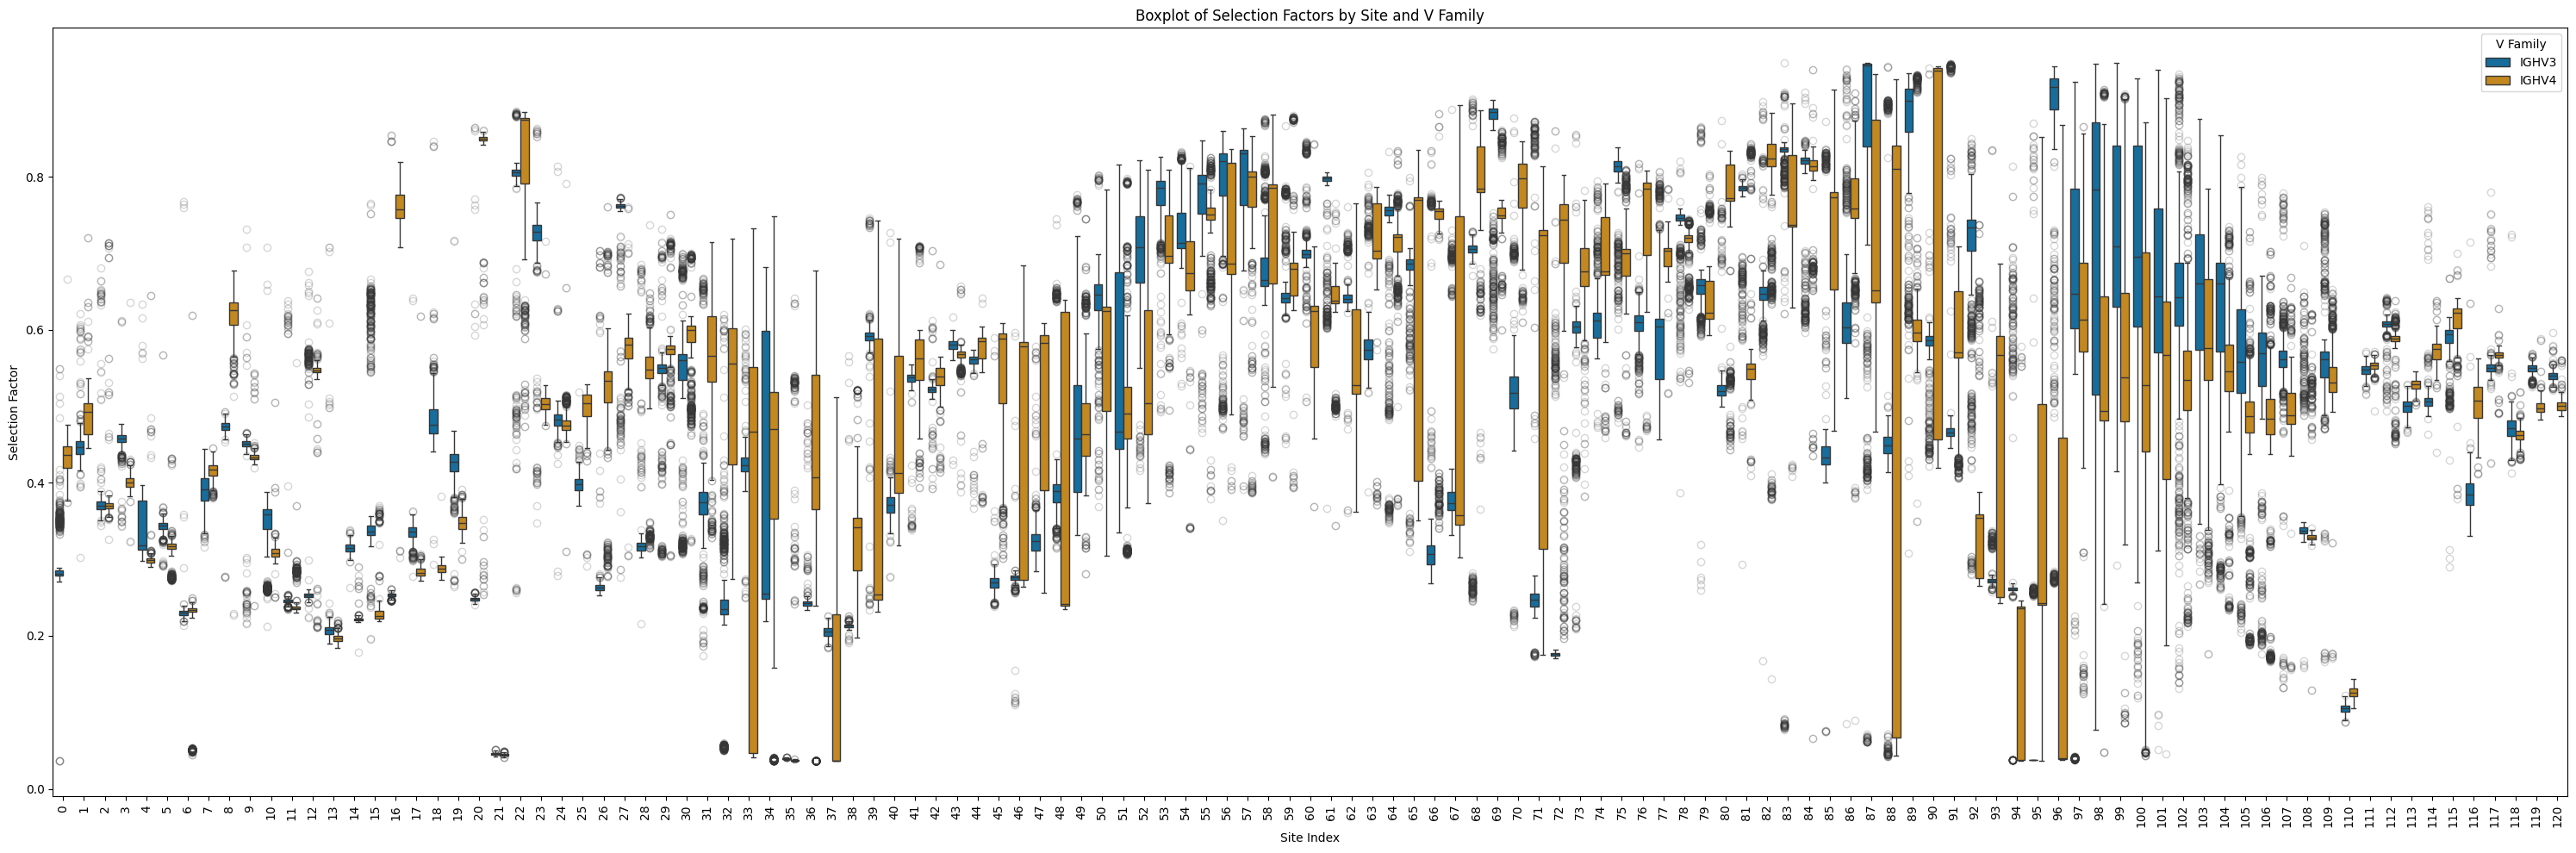

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

flierprops = dict(marker='o', color='#bbbbbb', alpha=0.2)


# Assuming same_parent_len_df is your DataFrame and plot_sample_count is defined
plot_sample_count = 1000  # or set to your specific requirement

# Keep only the 'v_family' and 'parent' columns for processing
df = same_parent_len_df[['v_family', 'parent']]

# Step 1: Sample the DataFrame according to your requirements
sampled_dfs = []
for v_family, group in df.groupby('v_family'):
    if len(group) > plot_sample_count:
        sampled_group = group.sample(n=plot_sample_count)
    else:
        sampled_group = group
    sampled_dfs.append(sampled_group)

# Concatenate the sampled DataFrames
sampled_df = pd.concat(sampled_dfs)

# Step 2: Translate the "parent" sequences to amino acid strings
sampled_df['aa_str'] = sampled_df['parent'].apply(translate_sequence)

# Step 3: Compute selection factors for each amino acid string
sampled_df['selection_factors'] = sampled_df['aa_str'].apply(burrito.dnsm.selection_factors_of_aa_str)

# Flatten the selection factors into a list with corresponding v_family labels and site index for plotting
plot_data = []
for index, row in sampled_df.iterrows():
    selection_factors_array = row['selection_factors'].cpu().numpy()
    for site_index, selection_factor in enumerate(selection_factors_array):
        plot_data.append({'v_family': row['v_family'], 'site_index': site_index, 'selection_factor': selection_factor})

plot_df = pd.DataFrame(plot_data)

# Step 4: Create the boxplot colored by v_family
plt.figure(figsize=(30, 10))  # Adjust the figure size as needed
sns.boxplot(x='site_index', y='selection_factor', hue='v_family', data=plot_df, palette='colorblind', flierprops=flierprops)
plt.xticks(rotation=90)  # Rotate the x-ticks if there are many sites
plt.xlabel('Site Index')
plt.ylabel('Selection Factor')
plt.title('Boxplot of Selection Factors by Site and V Family')
plt.legend(title='V Family')
plt.tight_layout()  # This will make sure everything fits without overlapping (might be necessary with many sites)
plt.show()
